## Import Libraries

In [224]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

## Import Data

In [225]:
df = pd.read_excel('premiums_with_life_style.xlsx')

print(f'The number of Rows is {df.shape[0]}')
print(f'The number of Cols is {df.shape[1]}')

The number of Rows is 10000
The number of Cols is 15


In [226]:
df.head()

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984


In [227]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'number_of_dependants', 'bmi_category',
       'smoking_status', 'employment_status', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount'],
      dtype='object')

## Data Cleaning

### Handle NA values

In [228]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
physical_activity         0
stress_level              0
number_of_dependants      0
bmi_category              0
smoking_status            9
employment_status         7
income_level             18
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [229]:
df.dropna(inplace=True)

In [230]:
df.shape

(9973, 15)

In [231]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
physical_activity        0
stress_level             0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

### Handle Duplicates

In [232]:
df.duplicated().sum()

np.int64(0)

In [233]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Handle outliers

In [234]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9973.000000,9973.000000,9973.000000,9973.000000
mean,41.319362,3.195628,23.382232,19503.816705
std,58.044687,21.679565,32.334811,8898.079736
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11774.000000
50%,37.000000,2.000000,16.000000,19314.000000
75%,50.000000,3.000000,31.000000,26500.000000
max,1178.000000,456.000000,960.000000,45854.000000


#### Handle Outliers : number_of_dependants

In [235]:
df[df.number_of_dependants < 0]['number_of_dependants'].unique()

array([], dtype=int64)

In [236]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    9973.000000
mean        3.195628
std        21.679565
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max       456.000000
Name: number_of_dependants, dtype: float64

In [237]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9973.000000,9973.000000,9973.000000,9973.000000
mean,41.319362,3.195628,23.382232,19503.816705
std,58.044687,21.679565,32.334811,8898.079736
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11774.000000
50%,37.000000,2.000000,16.000000,19314.000000
75%,50.000000,3.000000,31.000000,26500.000000
max,1178.000000,456.000000,960.000000,45854.000000


#### Handle Outliers : numerical columns

In [238]:
numerical_cols = df.select_dtypes(['float64', 'int64']).columns
numerical_cols

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

In [239]:
def boxPlots(data, cols):
    for col in cols:
        sns.boxplot(data, x=col)
        plt.show()

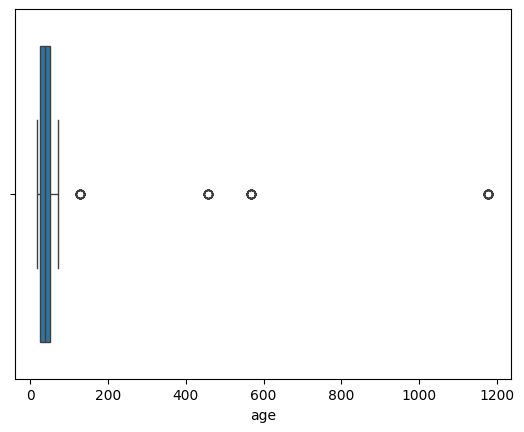

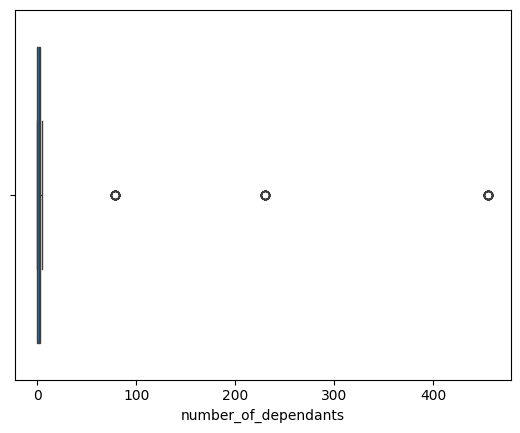

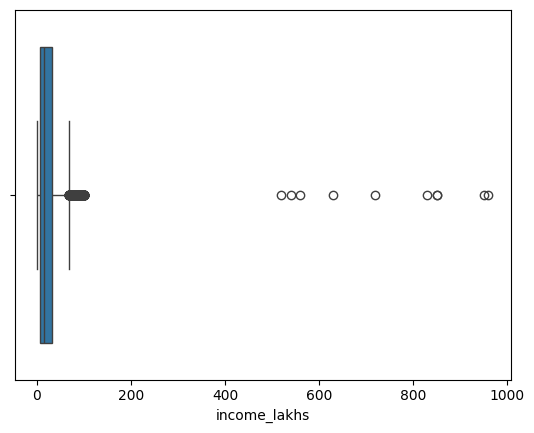

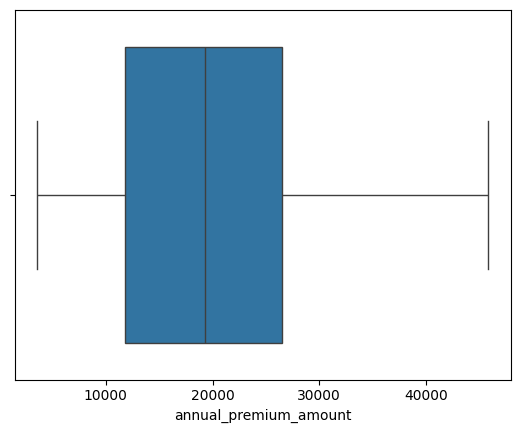

In [240]:
boxPlots(df, numerical_cols)

##### Handle Outliers : numerical columns (number_of_dependants)

In [241]:
df[df['number_of_dependants'] > 5].shape[0]

47

In [242]:
df.drop(df[df['number_of_dependants'] > 5].index, inplace=True)

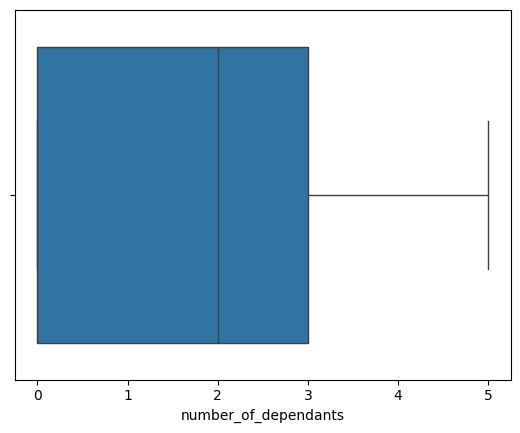

In [243]:
boxPlots(df, ['number_of_dependants'])

In [244]:
df.shape

(9926, 15)

##### Handle Outliers : numerical columns (age)

In [245]:
df[df.age > 100].shape

(58, 15)

In [246]:
df1 = df[df.age < 100].copy()

In [247]:
df1.shape

(9868, 15)

In [248]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9868.000000,9868.000000,9868.000000,9868.000000
mean,37.756486,1.919133,23.411634,19511.417714
std,13.976822,1.503264,32.437621,8900.941540
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11776.250000
50%,37.000000,2.000000,16.000000,19327.500000
75%,50.000000,3.000000,31.000000,26505.250000
max,72.000000,5.000000,960.000000,45854.000000


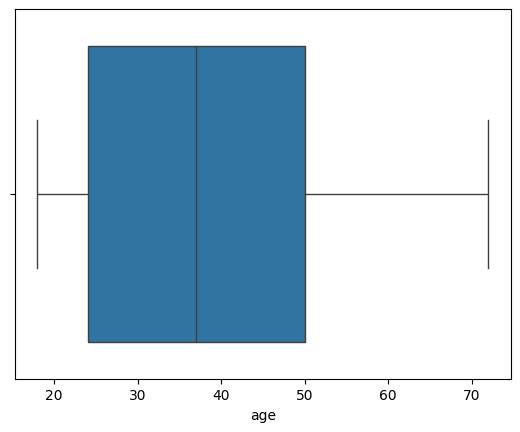

In [249]:
boxPlots(df1, ['age'])

##### Handle Outliers : numerical columns (income_lakhs)

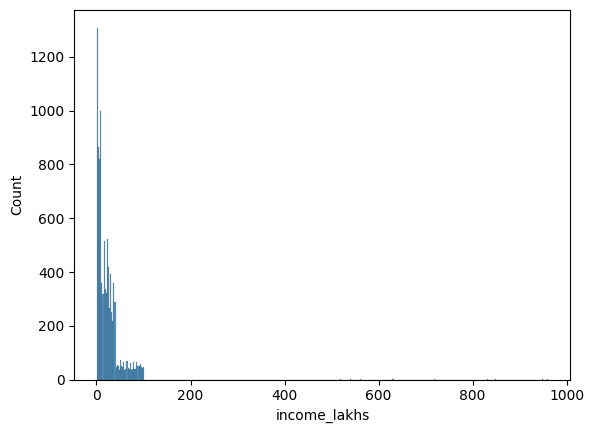

In [250]:
sns.histplot(df1, x='income_lakhs')
plt.show()

In [251]:
def get_iqr_bounds(col):
    q1, q3 = col.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

In [252]:
lower_bound, upper_bound = get_iqr_bounds(df1['income_lakhs'])
lower_bound, upper_bound

(-31.5, 68.5)

In [253]:
quantile_threshold = df1.income_lakhs.quantile(0.999)
quantile_threshold

np.float64(155.86000000068452)

In [254]:
df2 = df1[df1.income_lakhs <= quantile_threshold].copy()
df2.shape

(9858, 15)

In [255]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9858.000000,9858.000000,9858.000000,9858.000000
mean,37.764760,1.919963,22.683709,19513.853419
std,13.976268,1.503027,22.453283,8900.593367
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11777.000000
50%,37.000000,2.000000,16.000000,19331.500000
75%,50.000000,3.000000,31.000000,26505.750000
max,72.000000,5.000000,100.000000,45854.000000


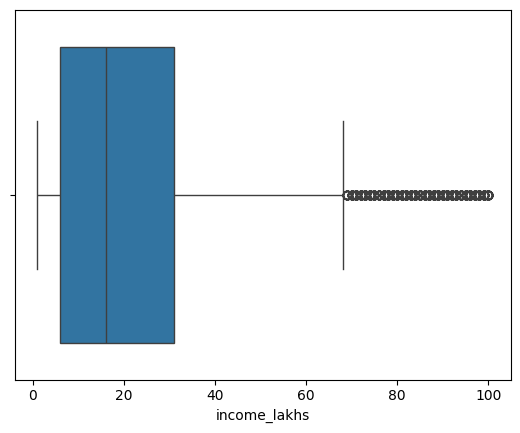

In [256]:
boxPlots(df2, ['income_lakhs'])

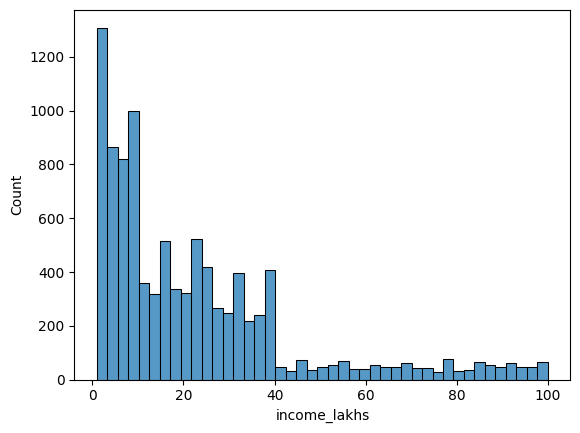

In [257]:
sns.histplot(df2, x='income_lakhs')
plt.show()

## Data Analysis

### Data Analysis : numerical columns

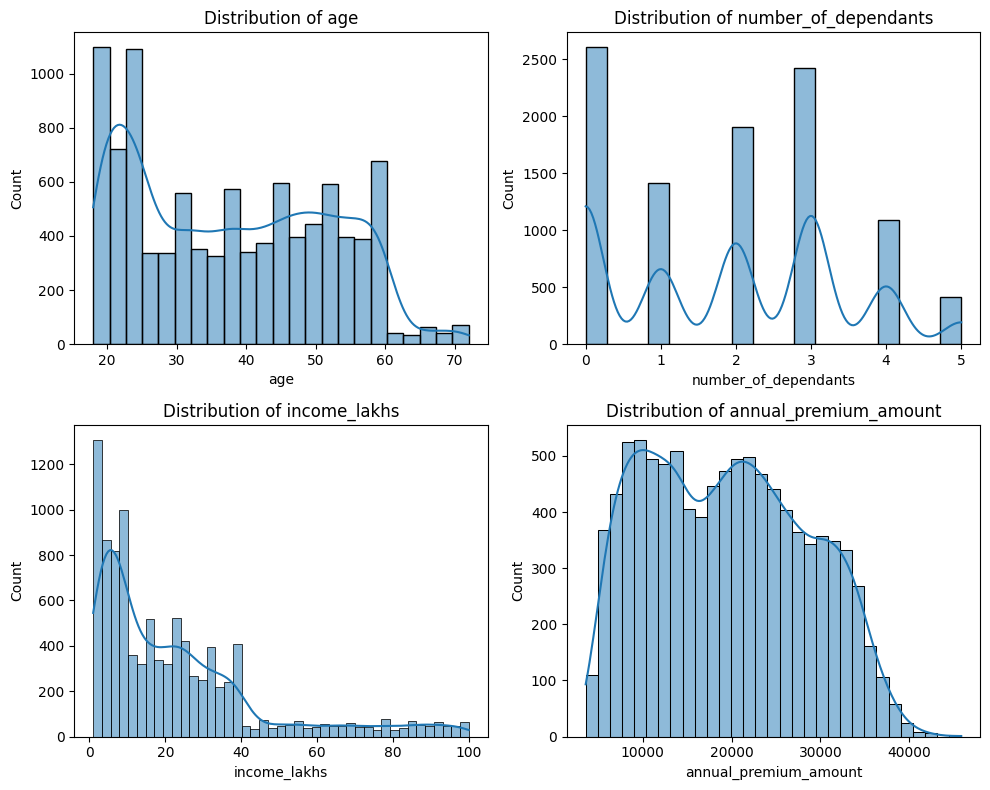

In [258]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 grid

for ax, col in zip(axes.flatten(), numerical_cols[:4]):  # [:4] just in case you have more than 4
    sns.histplot(df2, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

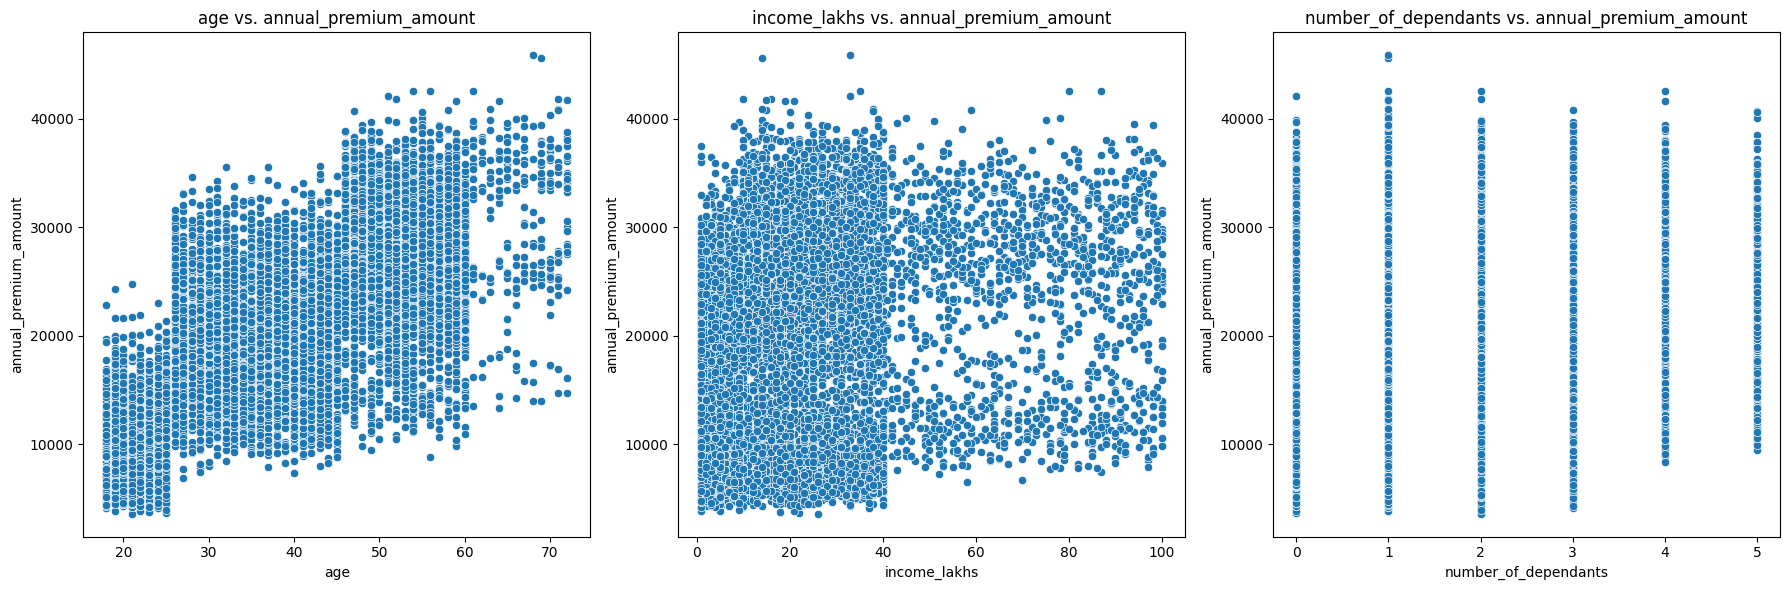

In [259]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']
target = 'annual_premium_amount'

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 6))  # 2x2 grid

for ax, col in zip(axes, numeric_features):
    sns.scatterplot(x=df2[col], y=df2[target], ax=ax)
    ax.set_title(f'{col} vs. {target}')
    ax.set_xlabel(col)
    ax.set_ylabel(target)

plt.tight_layout()
plt.show()

### Data Analysis : Categorical columns

In [260]:
df2.head(1)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944


In [261]:
categorical_cols = ['gender', 'region', 'marital_status', 'physical_activity', 'stress_level', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']

categorical_cols

['gender',
 'region',
 'marital_status',
 'physical_activity',
 'stress_level',
 'bmi_category',
 'smoking_status',
 'employment_status',
 'income_level',
 'medical_history',
 'insurance_plan']

In [262]:
for col in categorical_cols:
    print(f' {col} : {df2[col].unique()}')

 gender : ['Female' 'Male']
 region : ['Southeast' 'Northeast' 'Southwest' 'Northwest']
 marital_status : ['Unmarried' 'Married']
 physical_activity : ['Medium' 'Low' 'High']
 stress_level : ['Medium' 'High' 'Low']
 bmi_category : ['Normal' 'Overweight' 'Obesity' 'Underweight']
 smoking_status : ['No Smoking' 'Occasional' 'Regular']
 employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
 income_level : ['25L - 40L' '10L - 25L' '<10L' '> 40L']
 medical_history : ['High blood pressure' 'No Disease' 'Thyroid'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid' 'Diabetes'
 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease']
 insurance_plan : ['Gold' 'Silver' 'Bronze']


In [263]:
df2['smoking_status'] = df2['smoking_status'].replace({
        'Smoking=0': 'No Smoking',
        'Does Not Smoke': 'No Smoking',
        'Not Smoking': 'No Smoking',
})
df2.smoking_status.unique()

array(['No Smoking', 'Occasional', 'Regular'], dtype=object)

#### Univariate Analysis : Categorical columns

In [264]:
def barPlot(data, cols):
    n_cols = 3  # number of plots per row
    n_rows = (len(cols) + n_cols - 1) // n_cols  # ceiling division for rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()  # to loop easily

    for i, col in enumerate(cols):
        pct_count = data[col].value_counts(normalize=True)
        sns.barplot(x=pct_count.index, y=pct_count.values, ax=axes[i])
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Proportion')

    # Hide unused subplots if cols is not a multiple of 3
    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

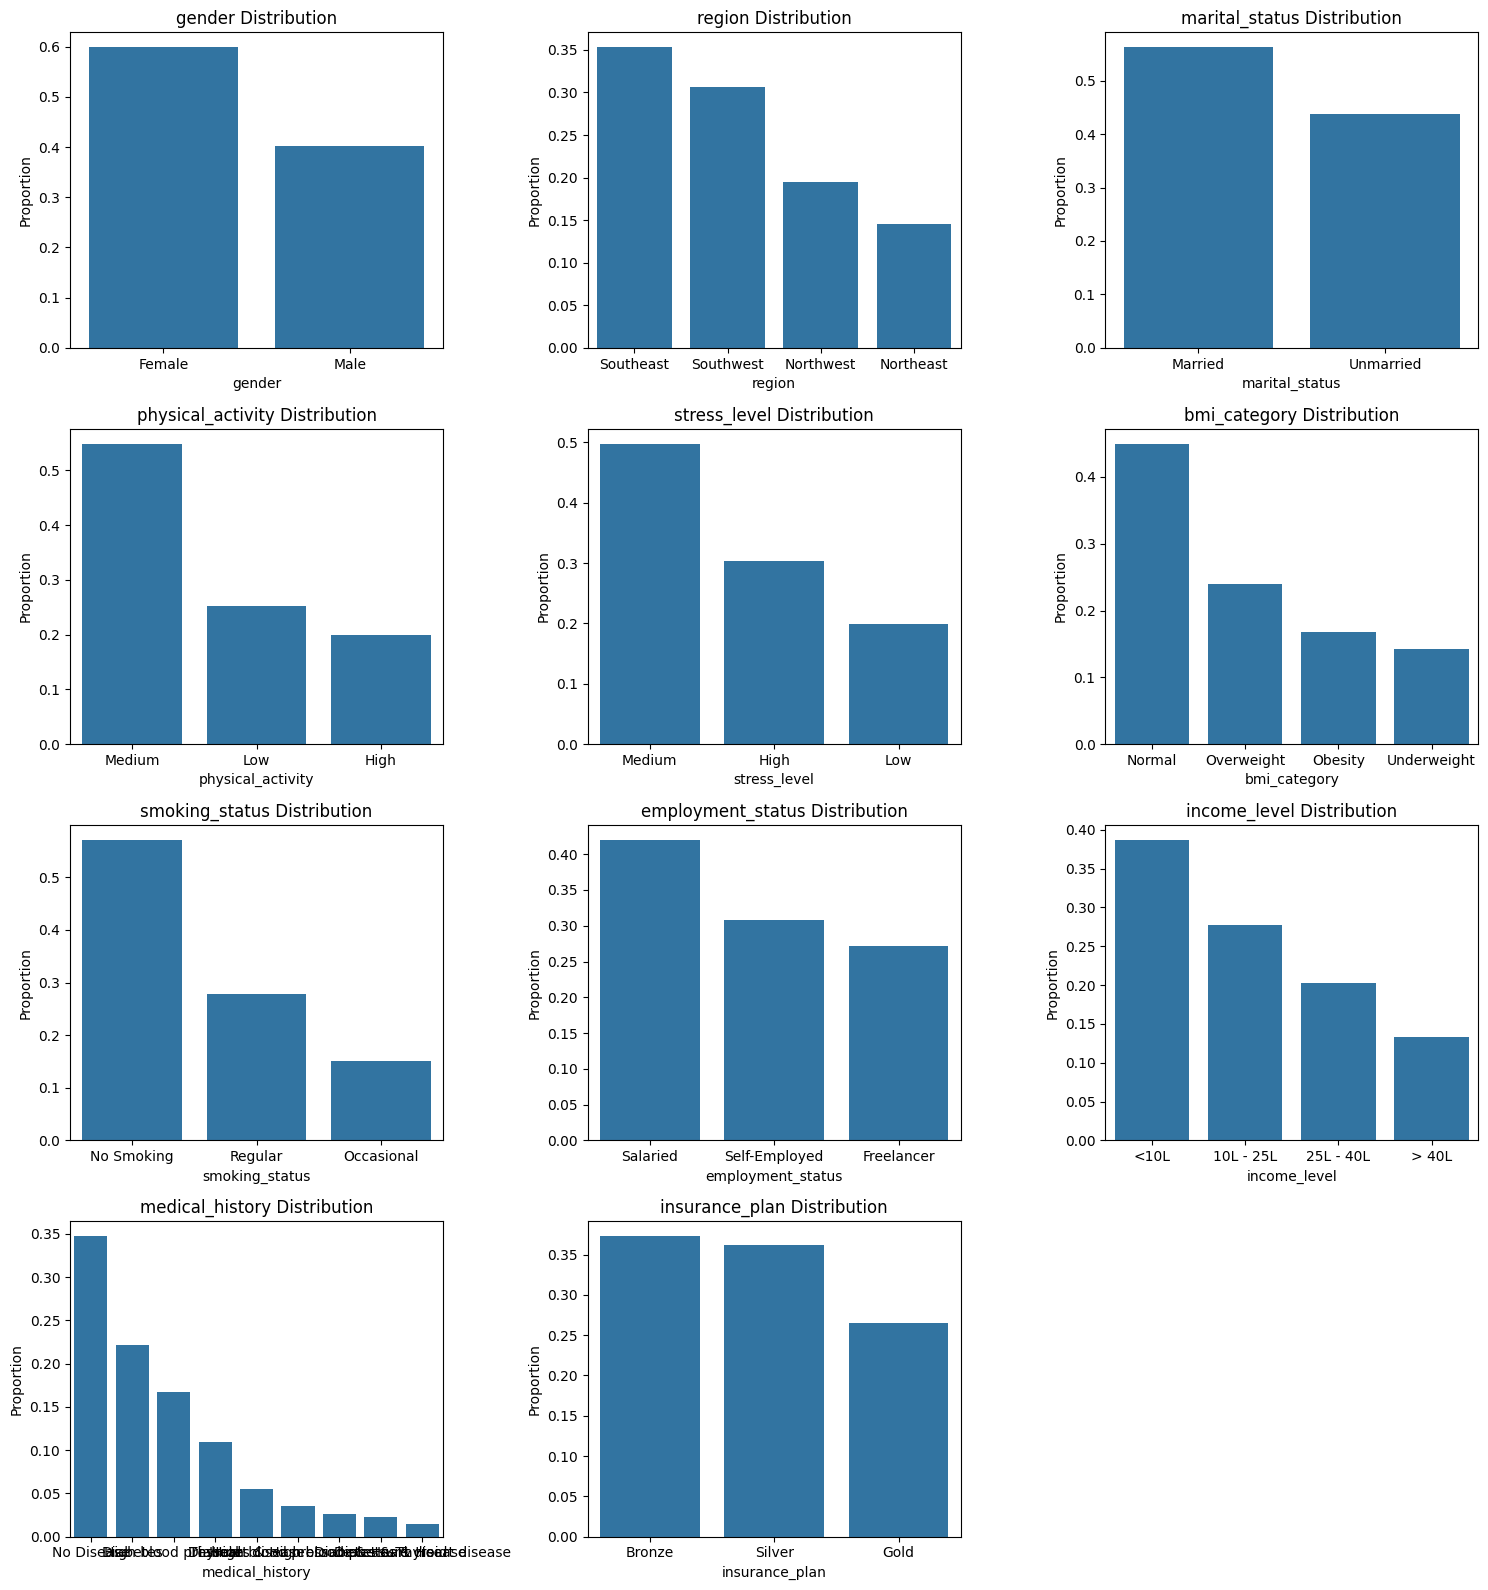

In [265]:
barPlot(df2, categorical_cols)

#### Bivariate Analysis : Categorical columns

In [266]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,822,909,998
25L - 40L,533,733,733
<10L,2266,184,1366
> 40L,55,788,471


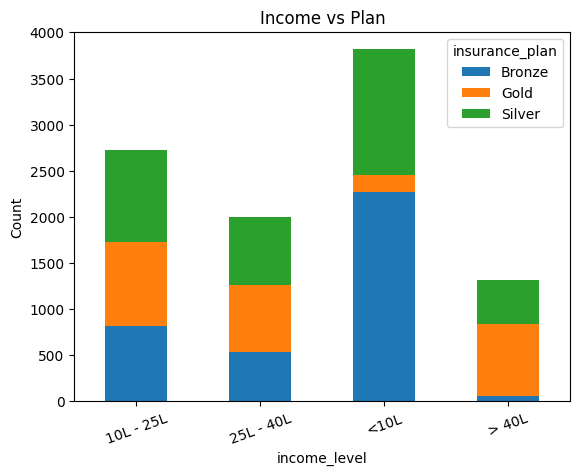

In [267]:
crosstab.plot(kind='bar', stacked=True)
plt.title('Income vs Plan')
plt.xticks(rotation=20)
plt.ylabel('Count')
plt.show()

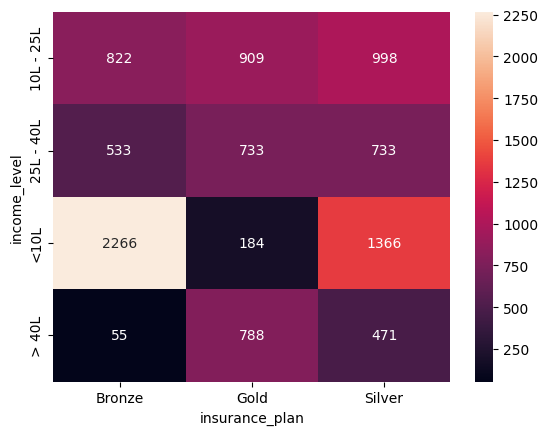

In [268]:
sns.heatmap(crosstab, annot=True, fmt='d')
plt.show()

## Feature Engineering

#### Medical History

In [269]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease', 'Thyroid',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes', 'Heart disease', 'Diabetes & High blood pressure',
       'Diabetes & Heart disease'], dtype=object)

In [270]:
risk_scores_dictionary = {
    'diabetes': 6,
    'heart disease': 8,
    'high blood pressure': 6,
    'thyroid': 5,
    'no disease': 0,
    'none': 0
}

In [271]:
df2[['disease1', 'disease2']] = df2.medical_history.str.split(' & ', expand=True).apply(lambda x: x.str.lower())
df2.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,None
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,None
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459,no disease,None
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685,thyroid,None
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984,high blood pressure,heart disease


In [272]:
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

df2.head()

C:\Users\Ahmad Fahim\AppData\Local\Temp\ipykernel_5076\1524846493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace=True)
C:\Users\Ahmad Fahim\AppData\Local\Temp\ipykernel_5076\1524846493.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,none,0
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,none,0
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459,no disease,none,0
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685,thyroid,none,0
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984,high blood pressure,heart disease,0


In [273]:
df2['total_risk_score'] = df2['disease1'].map(risk_scores_dictionary) + df2['disease2'].map(risk_scores_dictionary)

df2.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,none,6
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,none,0
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459,no disease,none,0
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685,thyroid,none,5
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984,high blood pressure,heart disease,14


In [274]:
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944,high blood pressure,none,6,0.428571
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108,no disease,none,0,0.000000


In [275]:
df2.sample(5)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
2621,52,Female,Northwest,Married,Medium,Medium,3,Normal,No Smoking,Freelancer,> 40L,44,Diabetes & High blood pressure,Gold,30332,diabetes,high blood pressure,12,0.857143
1167,54,Female,Northeast,Married,Low,Medium,2,Normal,No Smoking,Self-Employed,<10L,8,High blood pressure,Silver,22247,high blood pressure,none,6,0.428571
7276,23,Male,Southwest,Unmarried,High,Medium,0,Overweight,Regular,Salaried,<10L,8,No Disease,Bronze,9779,no disease,none,0,0.000000
7114,55,Female,Northwest,Married,High,Medium,3,Normal,No Smoking,Self-Employed,<10L,3,Heart disease,Silver,23810,heart disease,none,8,0.571429
8436,40,Female,Northwest,Unmarried,High,High,0,Overweight,No Smoking,Freelancer,10L - 25L,24,Diabetes & High blood pressure,Silver,22985,diabetes,high blood pressure,12,0.857143


#### Insurance Plan

In [276]:
insurance_plan_dictionary = {
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3,
}

df2['insurance_plan'] = df2['insurance_plan'].map(insurance_plan_dictionary)

In [277]:
df2['insurance_plan'].unique()

array([3, 2, 1])

#### Income Level

In [278]:
income_level_dictionary = {
    '<10L': 1,
    '10L - 25L': 2,
    '25L - 40L': 3,
    '> 40L': 4,
}

df2['income_level'] = df2['income_level'].map(income_level_dictionary)

In [279]:
df2['income_level'].unique()

array([3, 2, 1, 4])

In [280]:
df2.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,3,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,2,10,No Disease,2,21108,no disease,none,0,0.000000
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,1,9,No Disease,1,8459,no disease,none,0,0.000000
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,1,9,Thyroid,2,21685,thyroid,none,5,0.357143
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,heart disease,14,1.000000


#### Life Style Risk Score

In [281]:
physical_activity_dictionary = {
    'High': 0, 
    'Medium': 1, 
    'Low': 4
}

stress_level_dictionary = {
    'High': 4, 
    'Medium': 1, 
    'Low': 0
}

df2['life_style_risk_score'] = df2['physical_activity'].map(physical_activity_dictionary) + df2['stress_level'].map(stress_level_dictionary)
df2.head()

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score,life_style_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,3,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571,2
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,2,10,No Disease,2,21108,no disease,none,0,0.000000,8
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,1,9,No Disease,1,8459,no disease,none,0,0.000000,5
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,1,9,Thyroid,2,21685,thyroid,none,5,0.357143,1
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,heart disease,14,1.000000,5


In [282]:
max_score = df2['life_style_risk_score'].max()
min_score = df2['life_style_risk_score'].min()
df2['normalized_life_style_risk_score'] = (df2['life_style_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,...,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score,life_style_risk_score,normalized_life_style_risk_score
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,...,37,High blood pressure,3,27944,high blood pressure,none,6,0.428571,2,0.25
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,...,10,No Disease,2,21108,no disease,none,0,0.000000,8,1.00


#### Nomical cols

In [283]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']

df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head()

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,Medium,Medium,2,3,37,High blood pressure,3,27944,high blood pressure,...,1,0,1,0,0,0,0,0,0,1
1,38,Low,High,5,2,10,No Disease,2,21108,no disease,...,0,0,0,0,1,0,1,0,0,0
2,18,Medium,High,0,1,9,No Disease,1,8459,no disease,...,0,1,1,0,0,0,0,0,0,0
3,55,High,Medium,3,1,9,Thyroid,2,21685,thyroid,...,0,0,0,0,1,0,1,0,1,0
4,22,Medium,High,2,2,13,High blood pressure & Heart disease,1,15984,high blood pressure,...,1,0,1,0,0,0,0,1,0,1


#### Dropping excess columns

In [284]:
cols_to_drop = ['disease1', 'disease2', 'total_risk_score', 'medical_history', 'physical_activity', 'stress_level', 'life_style_risk_score']

df4 = df3.drop(cols_to_drop, axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,normalized_life_style_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,2,3,37,3,27944,0.428571,0.250,0,0,1,0,1,0,0,0,0,0,0,1
1,38,5,2,10,2,21108,0.000000,1.000,0,0,0,0,0,0,1,0,1,0,0,0
2,18,0,1,9,1,8459,0.000000,0.625,0,0,0,1,1,0,0,0,0,0,0,0
3,55,3,1,9,2,21685,0.357143,0.125,1,0,0,0,0,0,1,0,1,0,1,0
4,22,2,2,13,1,15984,1.000000,0.625,1,0,1,0,1,0,0,0,0,1,0,1


### Correlation Analysis

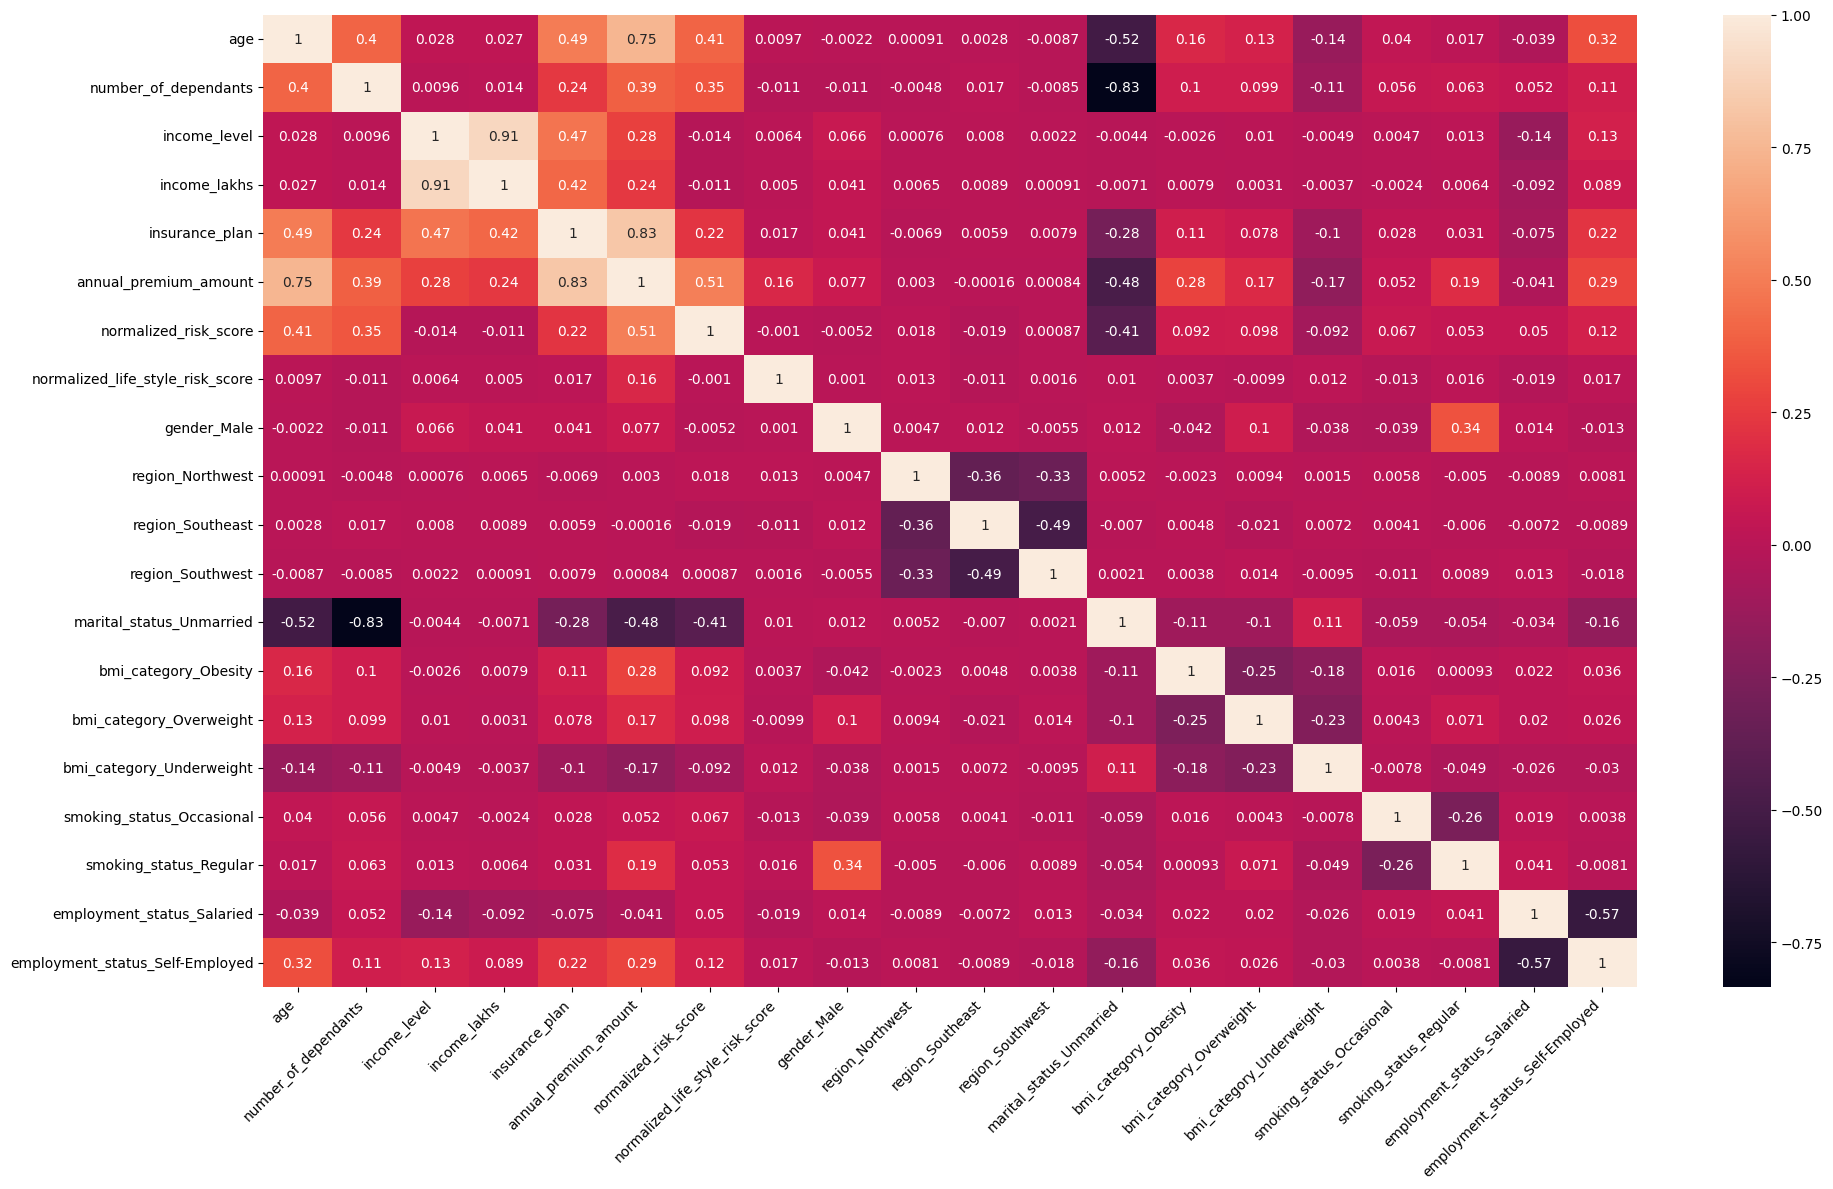

In [285]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

In [286]:
X = df4.drop(target, axis='columns')
y = df4[target]

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan']

scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [287]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,normalized_life_style_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000
mean,0.366014,0.383993,0.360756,0.219027,0.446135,0.326537,0.408349,0.401298,0.194664,0.353013,0.306452,0.437716,0.167985,0.240414,0.141712,0.150030,0.278657,0.420065,0.308176
std,0.258820,0.300605,0.352198,0.226801,0.395765,0.279083,0.268302,0.490186,0.395962,0.477931,0.461043,0.496131,0.373872,0.427356,0.348773,0.357119,0.448361,0.493594,0.461763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.050505,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.351852,0.400000,0.333333,0.151515,0.500000,0.428571,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.592593,0.600000,0.666667,0.303030,1.000000,0.428571,0.625000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [288]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculateVIF(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [289]:
calculateVIF(X)

,Column,VIF
0,age,5.541063
1,number_of_dependants,5.320401
2,income_level,12.548788
3,income_lakhs,10.947288
4,insurance_plan,4.147071
5,normalized_risk_score,3.001706
6,normalized_life_style_risk_score,3.110913
7,gender_Male,1.910118
8,region_Northwest,2.082989
9,region_Southeast,2.952809


In [290]:
X = X.drop('income_level', axis='columns')

calculateVIF(X)

,Column,VIF
0,age,5.488217
1,number_of_dependants,5.306542
2,income_lakhs,2.450579
3,insurance_plan,3.875312
4,normalized_risk_score,3.001684
5,normalized_life_style_risk_score,3.110034
6,gender_Male,1.901611
7,region_Northwest,2.082813
8,region_Southeast,2.951877
9,region_Southwest,2.678296


In [291]:
X.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,normalized_life_style_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.703704,0.4,0.363636,1.0,0.428571,0.250,0,0,1,0,1,0,0,0,0,0,0,1
1,0.370370,1.0,0.090909,0.5,0.000000,1.000,0,0,0,0,0,0,1,0,1,0,0,0
2,0.000000,0.0,0.080808,0.0,0.000000,0.625,0,0,0,1,1,0,0,0,0,0,0,0
3,0.685185,0.6,0.080808,0.5,0.357143,0.125,1,0,0,0,0,0,1,0,1,0,1,0
4,0.074074,0.4,0.121212,0.0,1.000000,0.625,1,0,1,0,1,0,0,0,0,1,0,1


## Model Training

In [292]:
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)

### Linear Regression

In [293]:
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [294]:
train_score = model_LR.score(X_train, y_train)
test_score = model_LR.score(X_test, y_test)

print(f'Training data score: {train_score}')
print(f'Test data score: {test_score}')

Training data score: 0.9586426437876246
Test data score: 0.9572516785678009


In [295]:
y_pred = model_LR.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')
print(f'R2 Score: {r2}')

Mean Squared Error: 3320807.903487829
Root Mean Squared Error: 1822.3083996645105
R2 Score: 0.9556768494369986


In [296]:
X.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_risk_score', 'normalized_life_style_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [297]:
model_LR.coef_

array([ 1.06758379e+04, -6.71110352e+02, -7.08275605e+02,  1.33118468e+04,
        6.52143869e+03,  4.72438663e+03,  1.19610216e+01,  7.70618764e+01,
        8.83253087e+01, -9.70125833e+00, -8.20804958e+02,  4.16609646e+03,
        2.11921567e+03,  4.13650051e+02,  1.15950875e+03,  3.11648269e+03,
        1.78946517e+01,  3.82995584e+02])

In [298]:
model_LR.intercept_

np.float64(3892.501665390888)

In [299]:
feature_importances = model_LR.coef_

coef_df = pd.DataFrame(feature_importances, columns=['Coefficients'], index=X.columns)
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
coef_df

,Coefficients
marital_status_Unmarried,-820.804958
income_lakhs,-708.275605
number_of_dependants,-671.110352
region_Southwest,-9.701258
gender_Male,11.961022
employment_status_Salaried,17.894652
region_Northwest,77.061876
region_Southeast,88.325309
employment_status_Self-Employed,382.995584
bmi_category_Underweight,413.650051


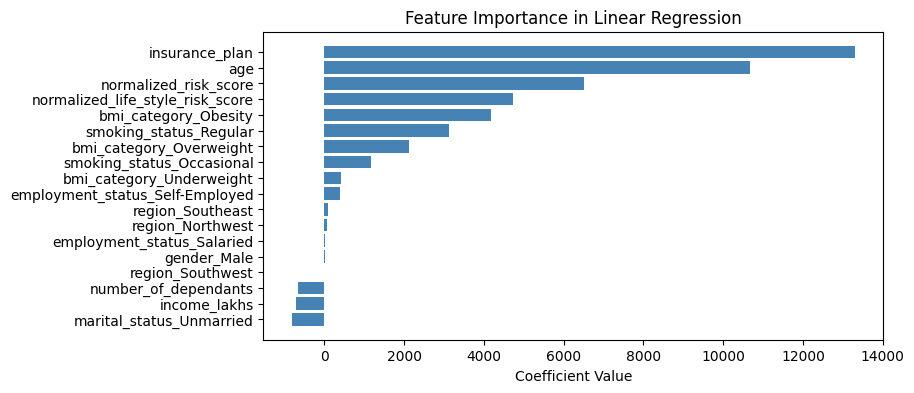

In [301]:
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df[ 'Coefficients'], color='steelblue') 
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.show()

### Ridge Regression

In [302]:
model_RG = Ridge()
model_RG.fit(X_train, y_train)

Ridge()

In [303]:
train_score = model_RG.score(X_train, y_train)
test_score = model_RG.score(X_test, y_test)

print(f'Training data score: {train_score}')
print(f'Test data score: {test_score}')

Training data score: 0.958641720188849
Test data score: 0.9572551952240952


In [304]:
y_pred = model_RG.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')
print(f'R2 Score: {r2}')

Mean Squared Error: 3320534.7198954755
Root Mean Squared Error: 1822.2334427552018
R2 Score: 0.9556140484469862


### XGBoost

In [305]:
from xgboost import XGBRegressor

model_XGB = XGBRegressor()
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [307]:
train_score = model_XGB.score(X_train, y_train)
test_score = model_XGB.score(X_test, y_test)

print(f'Training data score: {train_score}')
print(f'Test data score: {test_score}')

Training data score: 0.9980030655860901
Test data score: 0.9939571022987366


In [308]:
y_pred = model_XGB.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
r2 = r2_score(y_pred, y_test)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {np.sqrt(mse)}')
print(f'R2 Score: {r2}')

Mean Squared Error: 469429.3125
Root Mean Squared Error: 685.1491169811138
R2 Score: 0.993945300579071


In [309]:
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search= RandomizedSearchCV(model_XGB, param_grid, n_iter=10, cv=3, scoring='r2', random_state=4)
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9938327074050903)

In [310]:
best_model = random_search.best_estimator_

In [311]:
feature_importances = best_model.feature_importances_

coef_df = pd.DataFrame(feature_importances, columns=['Coefficients'], index=X.columns)
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)
coef_df

,Coefficients
gender_Male,0.000000
region_Southwest,0.000000
marital_status_Unmarried,0.000000
employment_status_Self-Employed,0.000000
region_Southeast,0.000075
region_Northwest,0.000078
number_of_dependants,0.000173
employment_status_Salaried,0.000216
income_lakhs,0.000238
bmi_category_Underweight,0.002124


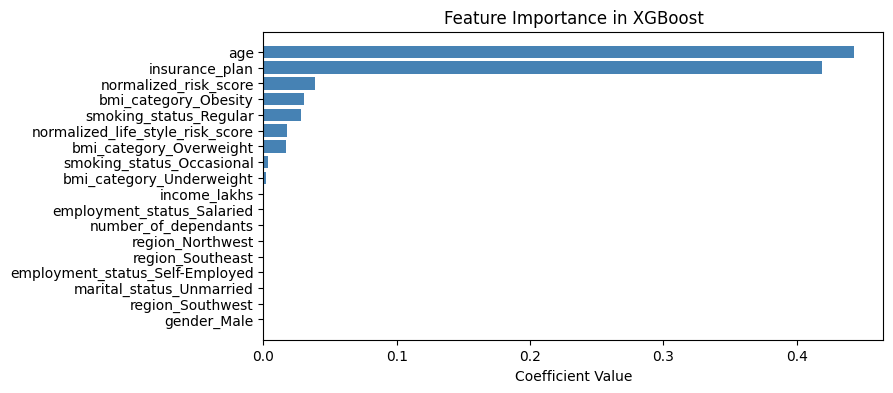

In [312]:
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df[ 'Coefficients'], color='steelblue') 
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

## Error Analysis

In [313]:
y_pred = best_model.predict(X_test)

In [314]:
residuals = y_pred - y_test
residuals_pct = residuals * 100 / y_test

In [315]:
results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct,
})
results_df.head()

,actual,predicted,diff,diff_pct
3021,13354,11963.750000,-1390.250000,-10.410738
6049,10701,11309.097656,608.097656,5.682625
6146,15146,16195.775391,1049.775391,6.931040
6418,8743,9119.887695,376.887695,4.310737
1537,27887,26613.031250,-1273.968750,-4.568325


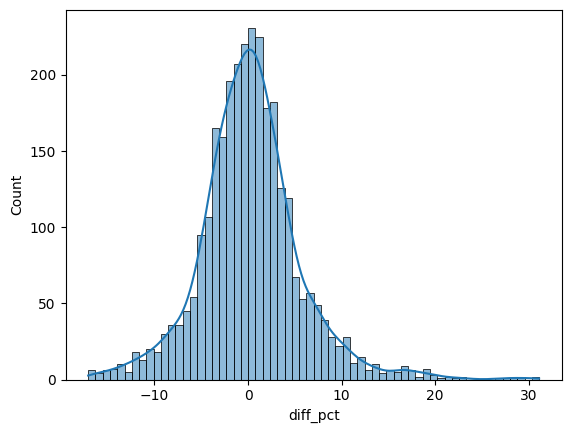

In [316]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.show()

In [317]:
threshold_margin_of_error = 10
extreme_results_df = results_df[np.abs(results_df.diff_pct) > threshold_margin_of_error]

In [318]:
extreme_errors_pct = extreme_results_df.shape[0] * 100 / results_df.shape[0]
print(f'Number of rows in results : {results_df.shape[0]}')
print(f'Number of rows in extreme error : {extreme_results_df.shape[0]}')
print(f'Percentage: {extreme_errors_pct}')

Number of rows in results : 2958
Number of rows in extreme error : 219
Percentage: 7.403651115618661


In [320]:
results_df[np.abs(results_df.diff_pct) > threshold_margin_of_error].sort_values('diff_pct', ascending=False)

,actual,predicted,diff,diff_pct
429,6872,9010.048828,2138.048828,31.112468
2985,3730,4867.947266,1137.947266,30.507970
82,8795,11392.550781,2597.550781,29.534403
3599,7419,9558.161133,2139.161133,28.833551
650,7826,10040.082031,2214.082031,28.291363
...,...,...,...,...
434,8174,6836.257324,-1337.742676,-16.365827
9259,7213,6007.030273,-1205.969727,-16.719392
8985,7231,6007.030273,-1223.969727,-16.926701
9018,6793,5637.903320,-1155.096680,-17.004220


In [321]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(5)

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,normalized_life_style_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
3021,0.018519,0.0,1.000000,0.5,0.000000,0.250,0,0,1,0,1,0,0,0,0,1,0,0
8330,0.111111,0.0,0.060606,0.0,0.000000,0.250,1,0,0,1,1,1,0,0,0,0,0,0
7800,0.037037,0.2,0.141414,0.0,0.000000,0.125,1,0,0,1,1,0,0,1,0,1,0,0
2644,0.018519,0.0,0.101010,0.0,0.428571,0.250,0,1,0,0,1,0,0,0,0,0,1,0
9814,0.092593,0.0,0.282828,0.0,0.000000,0.250,1,0,0,1,1,0,0,0,0,0,0,0


In [322]:
import math

def compareHistPlot(data1, data2, cols):
    num_cols = len(cols)
    rows = math.ceil(num_cols / 3)  # Max 3 charts per row
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten in case of multiple rows

    for i, col in enumerate(cols):
        sns.histplot(data1[col], kde=True, label='Overall', color='blue', ax=axes[i])
        sns.histplot(data2[col], kde=True, label='Errors', alpha=0.5, color='red', ax=axes[i])
        axes[i].legend()
        axes[i].set_title(f'Distribution of {col} for Errors vs Overall')

    # Hide unused subplots (if any)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

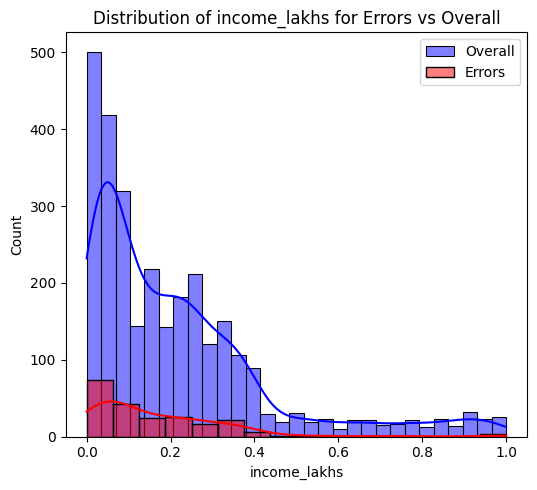

In [323]:
compareHistPlot(X_test, extreme_errors_df, ['income_lakhs'])

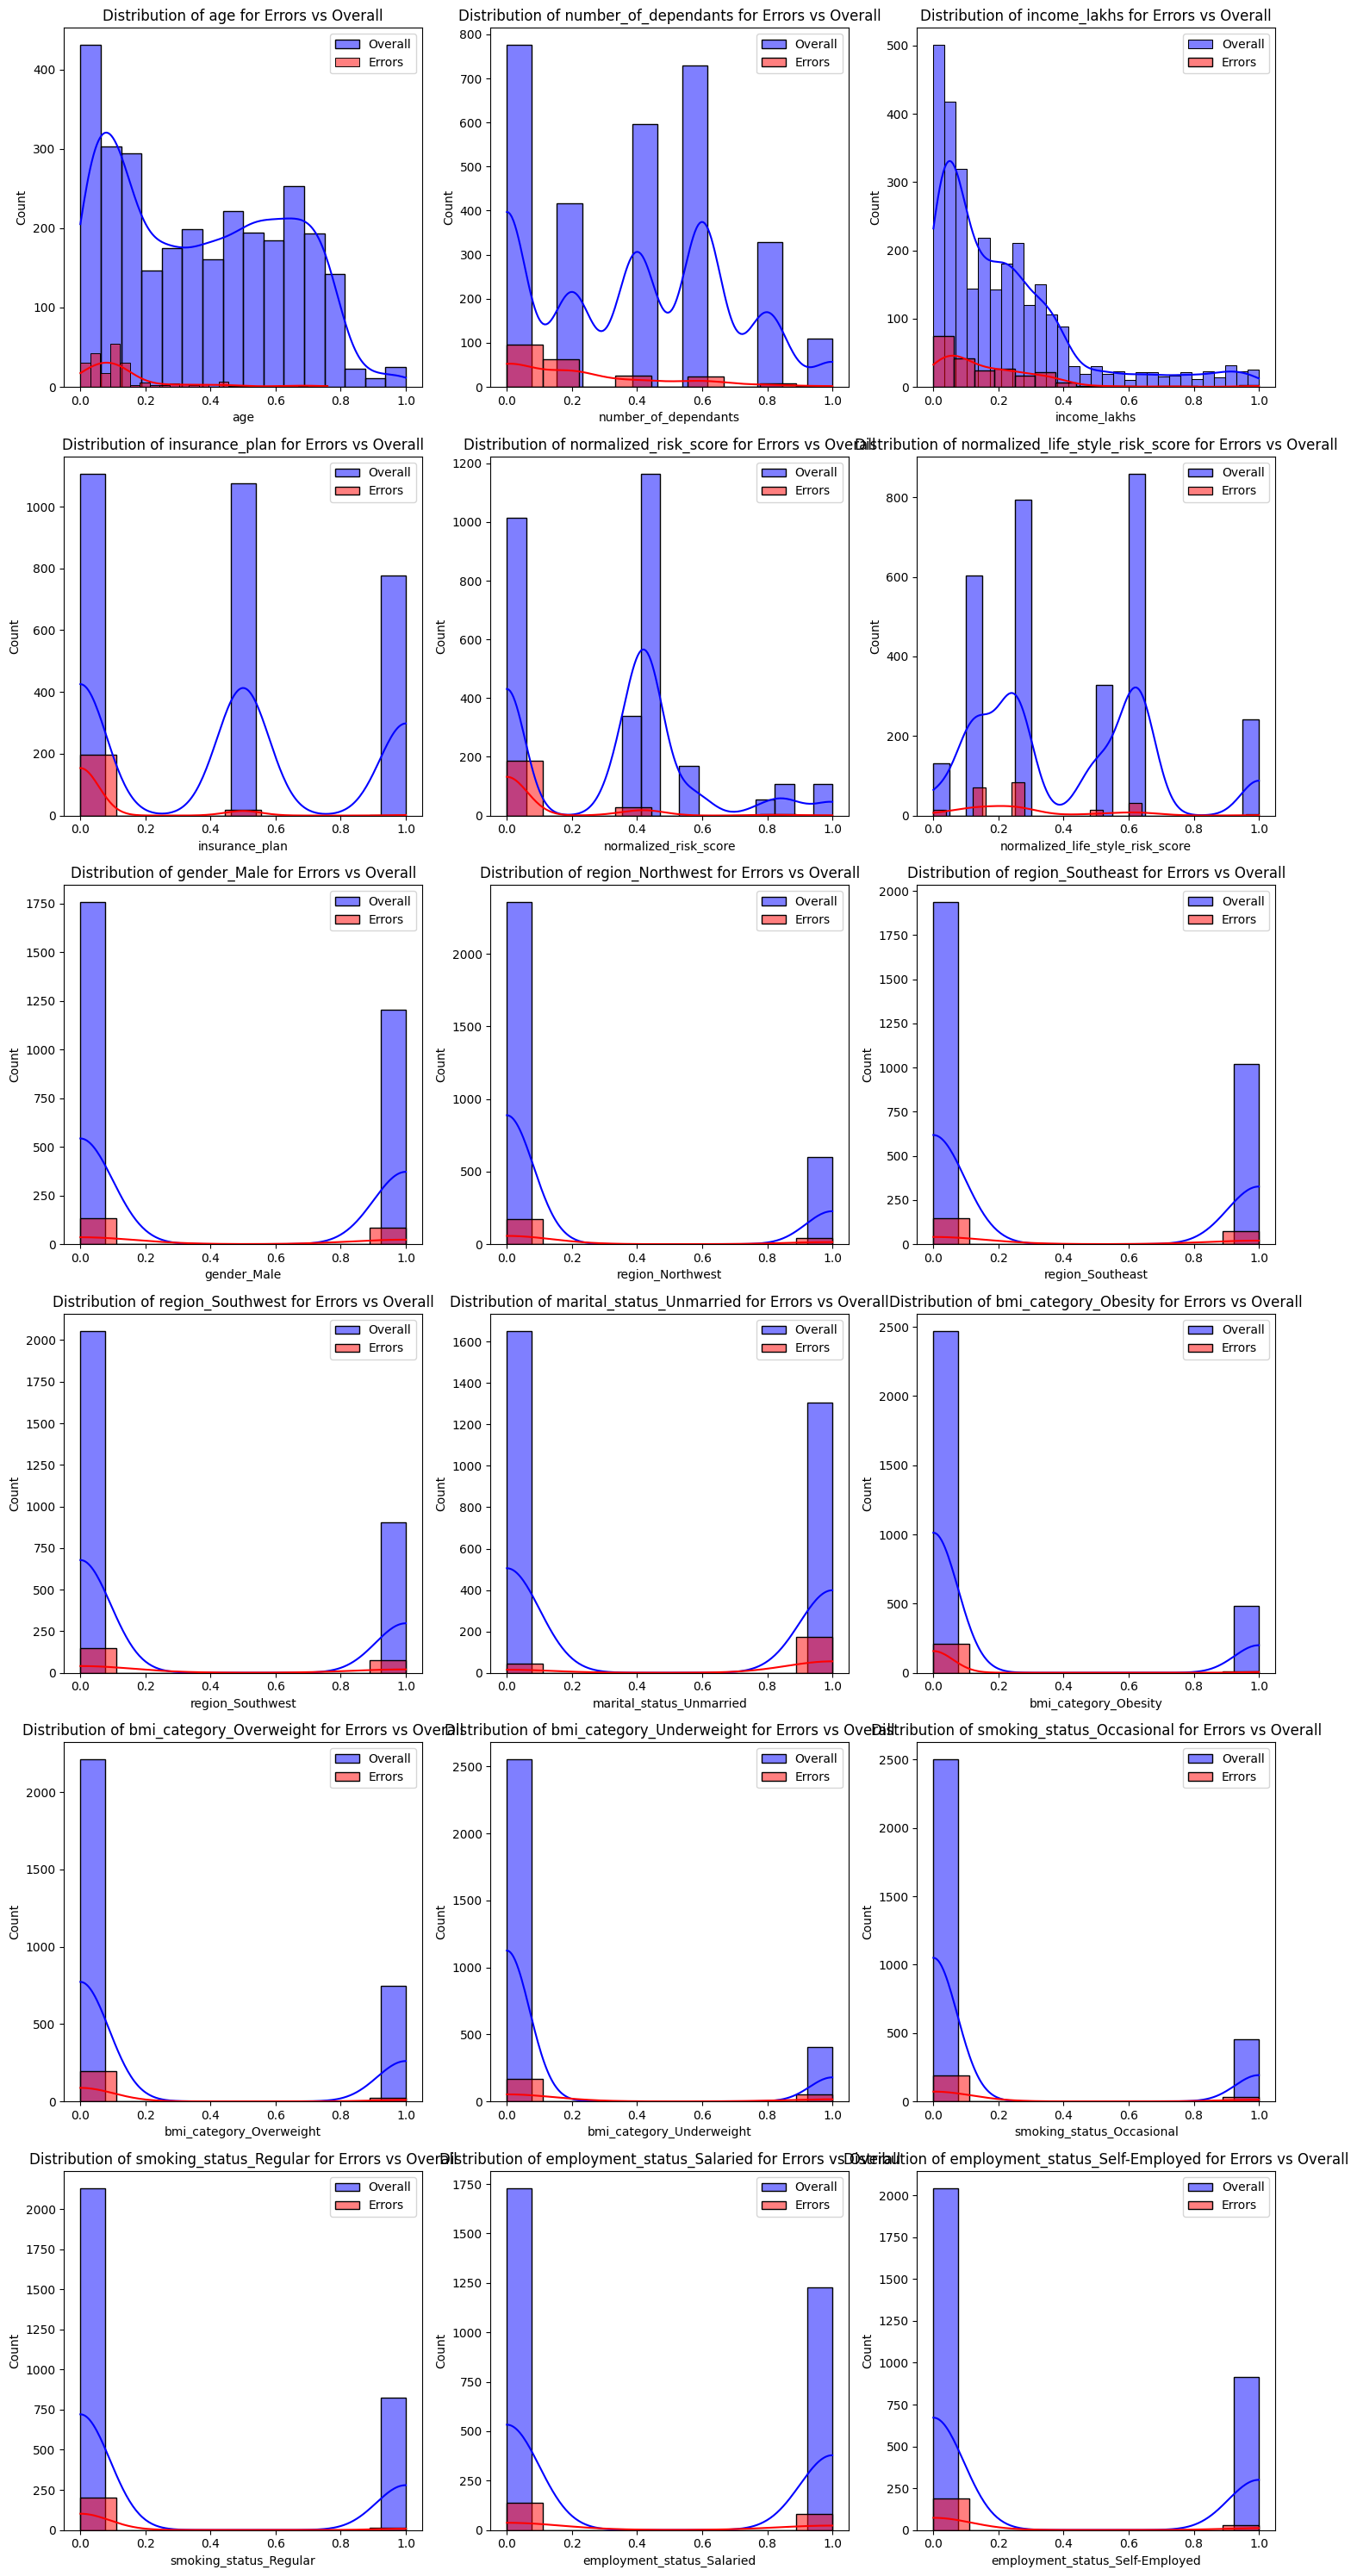

In [324]:
compareHistPlot(X_test, extreme_errors_df, X.columns)

In [325]:
extreme_errors_df['income_level'] = -1

In [326]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,19.0,0.0,-2.0,100.0,2.0
1,24.0,0.0,-2.0,7.0,1.0
2,20.0,1.0,-2.0,15.0,1.0
3,19.0,0.0,-2.0,11.0,1.0
4,23.0,0.0,-2.0,29.0,1.0
...,...,...,...,...,...
214,19.0,1.0,-2.0,17.0,3.0
215,18.0,1.0,-2.0,40.0,1.0
216,21.0,0.0,-2.0,27.0,1.0
217,34.0,1.0,-2.0,4.0,1.0


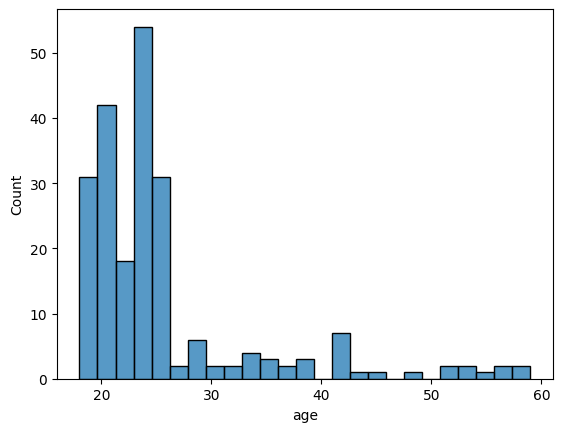

In [327]:
sns.histplot(df_reversed, x='age')
plt.show()

In [328]:
df_reversed['age'].quantile(0.98)

np.float64(54.63999999999998)